<a href="https://colab.research.google.com/github/cybertron002/TSF-GRIPJUNE21/blob/main/Task_2_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Objective
From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

###Author
Somesh Anand    

Simple K-means clustering on the Iris dataset

In [ ]:
#importing the libraries for the task
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Importing Iris dataset
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()  #Get all the information regarding dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
x = df.iloc[:, [1, 2, 3, 4]].values
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

##Using elbow method to predict the Optimum Number of Clusters

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x)               #To train the model and create classifier
    wcss.append(kmeans.inertia_) #To obtain the within cluster sum of square
wcss

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.345409315718165,
 46.53558205128205,
 38.93873974358974,
 34.19068792479662,
 29.905374299825105,
 27.927882157034972]

###plotting

Text(0.5, 1.0, 'Elbow Method')

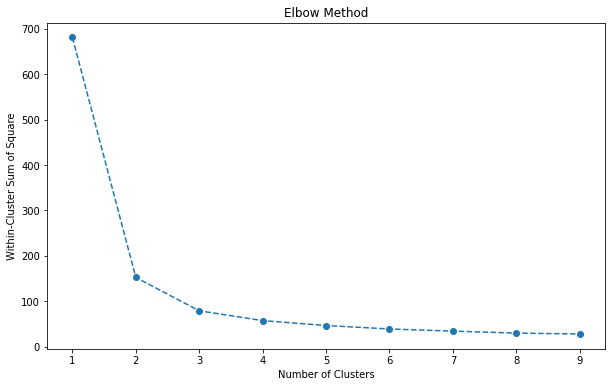

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),wcss,"o--")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Square")
plt.title("Elbow Method")

Elbow point can be observed at 3. So the optimal number of clusters is 3.

###Creating K-mean Classifier Model

In [ ]:
kmeans=KMeans(n_clusters=3, random_state=0)
y=kmeans.fit_predict(x) #To train the model, create classifier and prediction for the dataset
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

###obtain the centroids of the clusters formed

In [ ]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

#Visualizing Centroids of the clusters

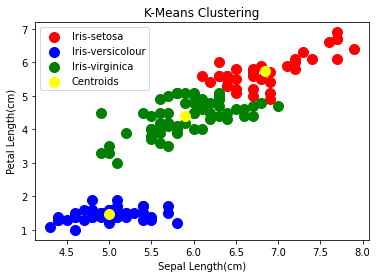

In [ ]:
#Visualising the clusters
plt.scatter(x[y == 0, 0], x[y == 0, 2], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y == 1, 0], x[y == 1, 2], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y == 2, 0], x[y == 2, 2], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2], s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel("Sepal Length(cm)")
plt.ylabel("Petal Length(cm)")
plt.title("K-Means Clustering")
plt.legend()

All three centroids can be observed in yellow dots.